In [ ]:
import requests
import re
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [ ]:
r_3 = requests.get('http://kaeru-dayo.com/numbers3/numbers3-ichiran.php?kaisuu=all')
r_4 = requests.get('http://kaeru-dayo.com/numbers4/numbers4-ichiran.php?kaisuu=all')

In [ ]:
def get_prev_number(r):
    soup = BeautifulSoup(r.content, 'html.parser')
    num_list = [x.get_text() for x in soup.find_all('td', class_='number') ]
    kai_list = [x.get_text().replace('回','').replace('第','') for x in soup.find_all('td', class_='kaibetu') ]
    return pd.DataFrame({'kai': kai_list, 'num':num_list})[1:]

# 番３

In [ ]:
df_3 = get_prev_number(r_3)

In [ ]:
df_3['int_num'] = df_3['num'].apply(lambda x:int(x))
df_3['int_kai'] = df_3['kai'].apply(lambda x:int(x))

In [ ]:
df_3.plot.scatter(x='int_kai', y='int_num', figsize=(15,8))

In [ ]:
df_3[:100].plot.scatter(x='int_kai', y='int_num', figsize=(20,4))

# 番４

In [ ]:
df_4 = get_prev_number(r_4)

In [ ]:
df_4['int_num'] = df_4['num'].apply(lambda x:int(x))
df_4['int_kai'] = df_4['kai'].apply(lambda x:int(x))

In [ ]:
df_4.plot.scatter(x='int_kai', y='int_num', figsize=(15,8))

In [ ]:
df_4[:100].plot.scatter(x='int_kai', y='int_num', figsize=(20,4))

# 日付
日付での特徴量はなし

In [ ]:
def get_date(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'html.parser')
    date_list = [x.get_text() for x in soup.find_all('td')]
    df = pd.DataFrame()
    kai = [int(x.replace('第','').replace('回',''))  for idx, x in enumerate(date_list) if idx%3==0]
    y = [int(x.split('/')[0])  for idx, x in enumerate(date_list) if idx%3==1]
    m = [int(x.split('/')[1])  for idx, x in enumerate(date_list) if idx%3==1]
    d = [int(x.split('/')[2])  for idx, x in enumerate(date_list) if idx%3==1]

    return pd.DataFrame({'int_kai': kai, 'year':y, 'month': m, 'date': d})

In [ ]:
df_date = pd.DataFrame()
for x in range(1, 4641, 20):
    start =  '{0:04d}'.format(x)
    end = '{0:04d}'.format(x+19)
    df = get_date('https://takarakuji.rakuten.co.jp/backnumber/numbers3_detail/' + start+ '-' + end + '/')
    print(start)
    df_date = df_date.append(df, ignore_index=True)

In [ ]:
df_3_ = pd.merge(df_date, df_3, how='inner', on='int_kai')

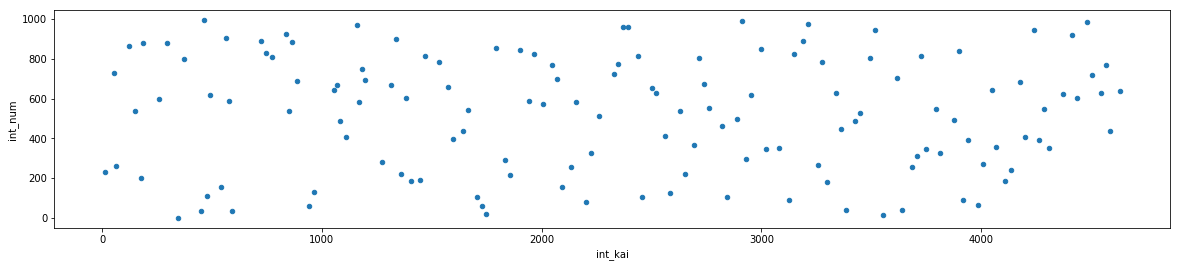

In [113]:
df_3_[df_3_['date'] == 30].plot.scatter(x='int_kai', y='int_num', figsize=(20,4))

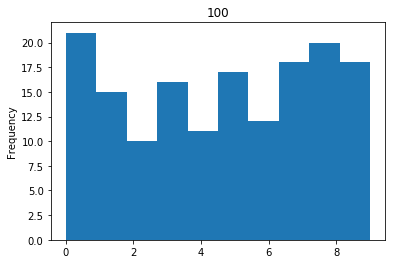

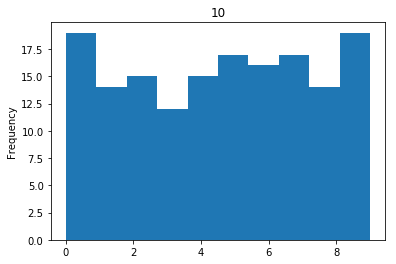

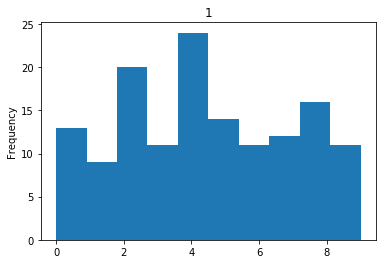

In [114]:
df_3_[df_3_['date'] == 7]['int_num'].apply(lambda x: int(x/100)).plot(kind='hist', title='100')
plt.show()
df_3_[df_3_['date'] == 7]['int_num'].apply(lambda x: int(x%100/10)).plot(kind='hist', title='10')
plt.show()
df_3_[df_3_['date'] == 1]['int_num'].apply(lambda x: int(x%10)).plot(kind='hist', title='1')
plt.show()

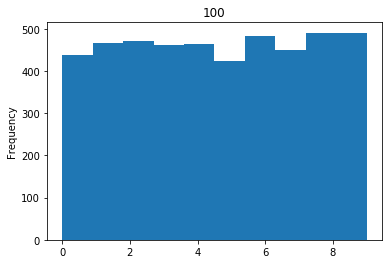

In [115]:
df_3_['int_num'].apply(lambda x: int(x/100)).plot(kind='hist', title='100')

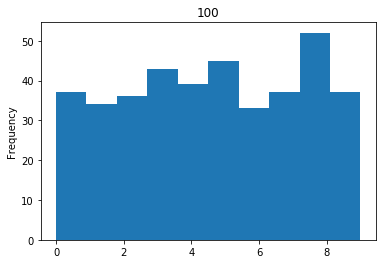

In [117]:
df_3_[df_3_['month'] == 7]['int_num'].apply(lambda x: int(x/100)).plot(kind='hist', title='100')